# Stability of Irregualr Moons 

In [13]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

Add a jupiter mass planet in the center

In [14]:
sim = rebound.Simulation()

jup = rebound.Particle(m=1e-3)
sim.add(jup)


Add some moons with inclinations varing from $30^\circ$ to $150^\circ$, including retrograde moons. Their initial semimajor axis is about 0.2 AU, and they do not have any initail eccentricity. Each moon are asigned with slightly different semimajor axis and small masses to avoid them influencing each others.

In [15]:

nmoon = 8
moonvar = np.linspace(30,150,nmoon)
moonx = np.linspace(0.2,0.201,nmoon) 
for i in range(len(moonvar)):
   moon = rebound.Particle()
   incmoon = moonvar[i]
   moon.m = 1e-30 
   moon.x = moonx[i]
   moon.vy = np.cos(incmoon/180.*np.pi)*np.sqrt((jup.m+moon.m)/moon.x)
   moon.vz = np.sin(incmoon/180.*np.pi)*np.sqrt((jup.m+moon.m)/moon.x)
   sim.add(moon)


Add a star at 5 AU away.

In [16]:

star = rebound.Particle()
star.m = 1.
star.x = 5.
star.vy = np.sqrt((jup.m+star.m)/star.x)
sim.add(star)

In [17]:
sim.move_to_hel()
   
tmax = 1.6e3
sim.integrator = "ias15"
sim.dt = 1e-2

# set up simulation
nout = 1000
xs = np.zeros((nmoon,nout))
eccs = np.zeros((nmoon,nout))
incs = np.zeros((nmoon,nout))
times = np.linspace(0.,tmax,nout)
cons = np.zeros((nmoon,nout))
ps = sim.particles
# record data for each time
for i in range(nout):
    sim.integrate(times[i])
    sim.move_to_hel()
    os = sim.calculate_orbits()
    for j in range(nmoon):
       tar = ps[j+1]
       xs[j][i] = np.sqrt(tar.x**2+tar.y**2+tar.z**2)
       eccs[j][i] = os[j].e
       #incs[j][i] = np.arctan(tar.vz/np.sqrt(tar.vx**2+tar.vy**2))
       #cons[j][i] = np.sqrt(1-tar.e**2)*np.sqrt(tar.vx**2+tar.vy**2)/np.sqrt(tar.vx**2+tar.vy**2+tar.vz**2)

All moons undergo Lidov–Kozai oscillation, where the eccentricity changes periodically. The moons with i = $47.1^\circ$, $133^\circ$ and $150^\circ$ are still bounded to the planet after 80 orbits. However, the moons with high inclinations unbound because their orbits approach the planet's Hill radius in aphelion. For those unbounded moons, the one with retrograde orbit always stay in bounded orbit for longer time comparing to the corresponding prograded ones. This suggests the retrograde irregular moons are more stable.  

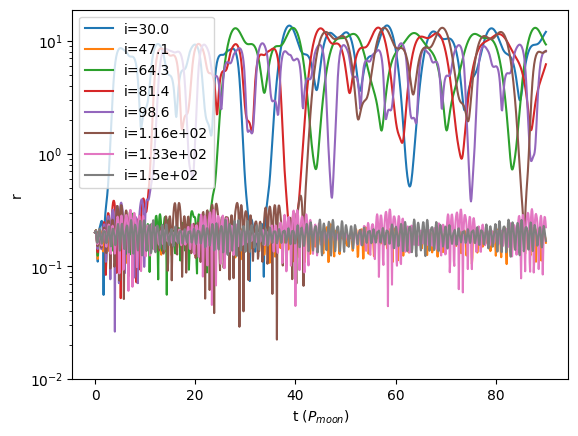

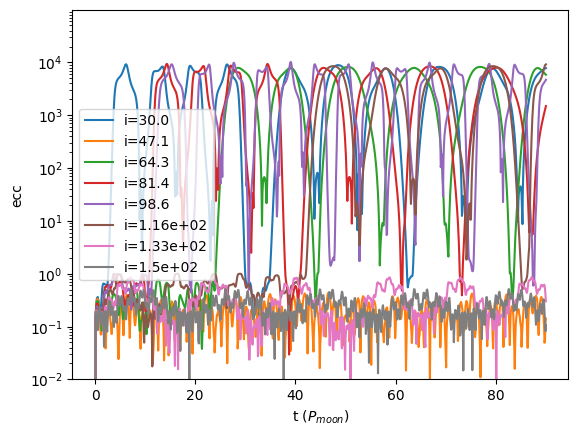

In [19]:
# plot r from jupiter
for j in range(nmoon):
   plt.plot(times/(2*np.pi/(np.sqrt(10**(-3)/0.2**3))),xs[j],label = 'i={:.3}'.format(moonvar[j]))
plt.ylabel('r')
plt.xlabel(r't ($P_{moon}$)')
plt.yscale('log')
plt.ylim(bottom = 0.01)
plt.legend()
plt.show()

'''
for j in range(nmoon):
   plt.plot(times/(2*np.pi/(np.sqrt(10**(-3)/0.2**3))),incs[j],label = '1={:.3}'.format(moonvar[j]))
plt.ylabel('inc')
plt.xlabel(r't ($P_{moon}$)')
plt.legend()
plt.show()
'''
for j in range(nmoon):
   plt.plot(times/(2*np.pi/(np.sqrt(10**(-3)/0.2**3))),eccs[j],label = 'i={:.3}'.format(moonvar[j]))
plt.ylabel('ecc')
plt.xlabel(r't ($P_{moon}$)')
plt.yscale('log')
plt.ylim(bottom = 0.01)
plt.legend()
plt.show()